In [ ]:
## Actividad 5: Uso de software para búsqueda
## Diego Iván Vázquez García   2007424     N4

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Cargar datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar datos
train_data = train_data / 255.0
test_data = test_data / 255.0

# Reshape para que sea compatible con la entrada de la red neuronal
train_data = train_data.reshape((train_data.shape[0], 28 * 28))
test_data = test_data.reshape((test_data.shape[0], 28 * 28))


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Definir modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_data, train_labels, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2362 - accuracy: 0.9316
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1005 - accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0706 - accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0417 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0351 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0247 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [4]:
# Evaluar el modelo con datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Exactitud del modelo en datos de prueba: {test_accuracy}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9791
Exactitud del modelo en datos de prueba: 0.9790999889373779


In [16]:
# Realizar predicciones con datos de prueba
predictions = model.predict(test_data[:5])

# Mostrar predicciones y valores reales
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = test_labels[i]
    print(f'Predicción: {predicted_label}, Valor Real: {true_label}')


1/1 [==============================] - 0s 139ms/step
Predicción: 7, Valor Real: 7
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 1
Predicción: 0, Valor Real: 0
Predicción: 4, Valor Real: 4


313/313 [==============================] - 2s 5ms/step


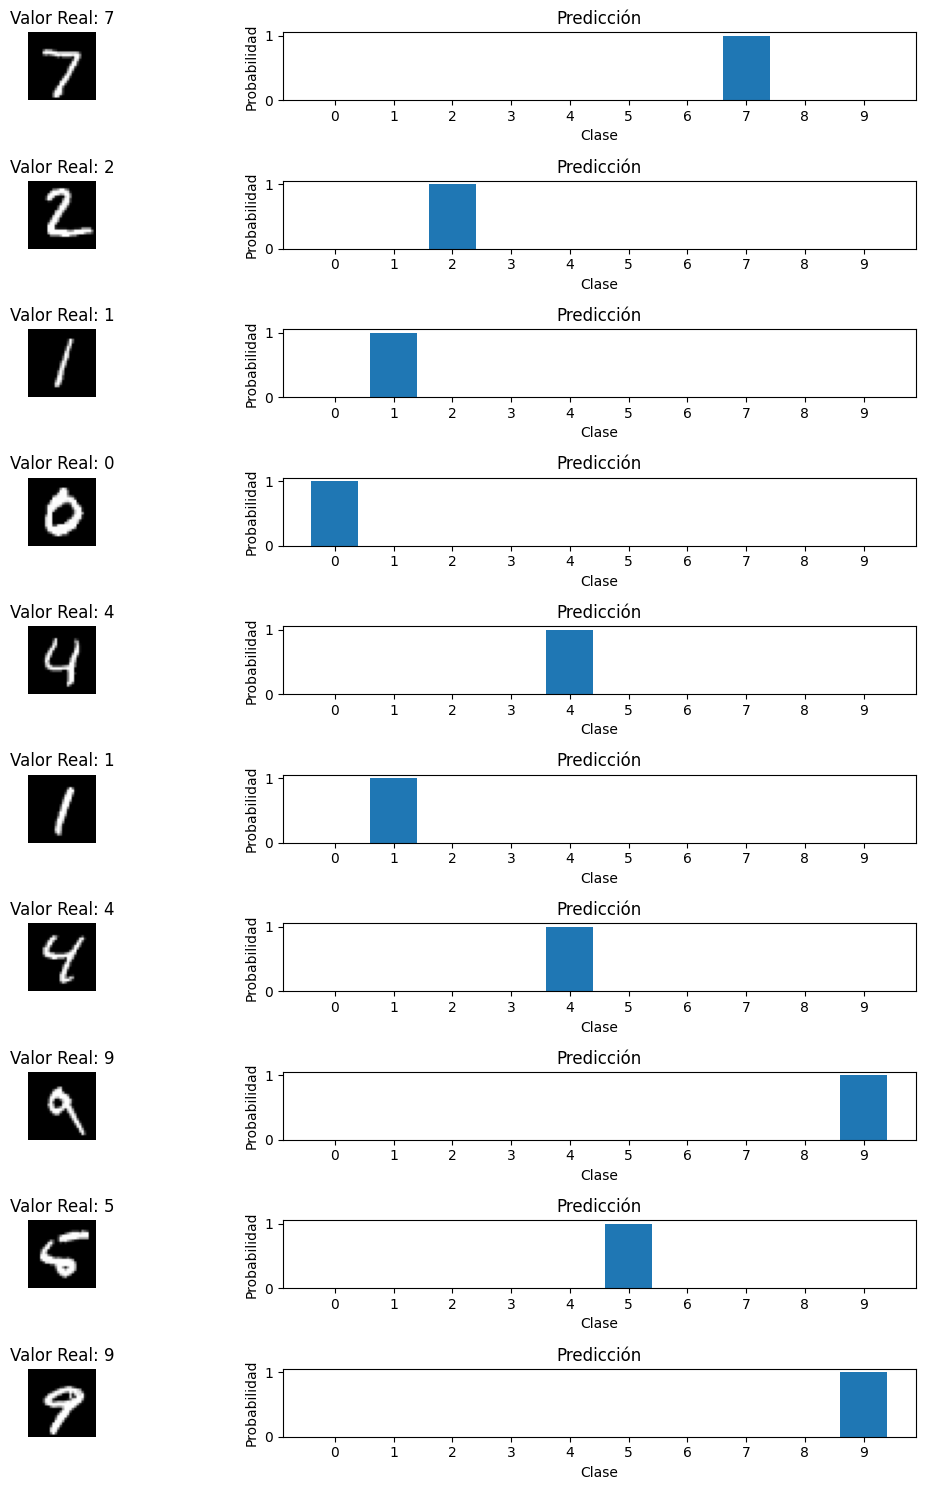

In [19]:
predictions = model.predict(test_data)

# Mostrar predicciones y valores reales para varias muestras (por ejemplo, las primeras 10 muestras)
num_samples = 10
plt.figure(figsize=(12, 15))

for i in range(num_samples):
    plt.subplot(num_samples, 2, 2*i+1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Valor Real: {test_labels[i]}')
    plt.axis('off')

    plt.subplot(num_samples, 2, 2*i+2)
    plt.bar(np.arange(10), predictions[i], tick_label=np.arange(10))
    plt.title('Predicción')
    plt.xlabel('Clase')
    plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()